In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../source/")
from fuzzy.fuzzyset import *
from fuzzy.operations import *

# Discrete Fuzzy Sets

In [2]:
oranges = DiscreteFuzzySet(["apple", "lemon", "oxanthera","orange"], [0.0, 0.2, 0.5, 1.0])

In [3]:
oranges[0.2]

array(['lemon', 'oxanthera', 'orange'], dtype='<U9')

In [4]:
try:
    oranges[-0.1]
except ValueError as v:
    print(v)

Alpha should be in [0,1], is -0.1


<BarContainer object of 4 artists>

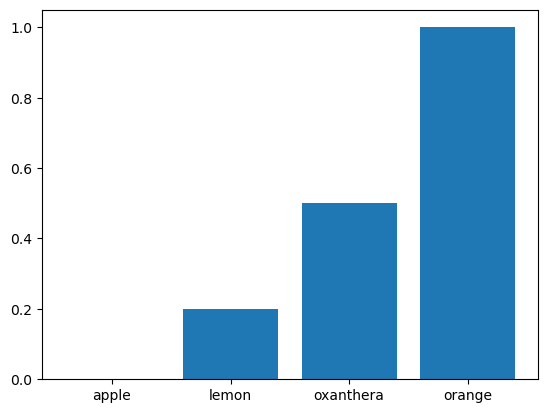

In [5]:
plt.bar(oranges.items, oranges.memberships)

In [6]:
try:
    print(oranges("pear"))
except ValueError as v:
    print(v)

0.0


In [7]:
oranges2 = DiscreteFuzzySet(["apple", "lemon", "oxanthera","orange"], [0.0, 0.2, 0.5, 1.0])

oranges == oranges2

True

In [8]:
oranges_nodynamic = DiscreteFuzzySet(["apple", "lemon", "oxanthera","orange"], [0.0, 0.2, 0.5, 1.0], dynamic=False)

oranges == oranges_nodynamic

False

In [9]:
lemons = DiscreteFuzzySet(["apple", "lemon", "oxanthera", "orange", "bergamot"], [0.0, 1.0, 0.2, 0.3, 0.45])

lemons == oranges

False

In [10]:
oranges3 = DiscreteFuzzySet(["apple", "lemon", "oxanthera","orange"], [0.0, 0.2, 0.3, 1.0])

oranges == oranges3

False

In [11]:
oranges.fuzziness()

1.7219280948873623

In [12]:
oranges.hartley()

0.6169925001442312

# Operations (Discrete)

In [13]:
max_t = maximum(oranges, lemons)
max_t("orange")

1.0

In [14]:
max_t[0.5]

array(['orange', 'oxanthera', 'lemon'], dtype='<U9')

<BarContainer object of 6 artists>

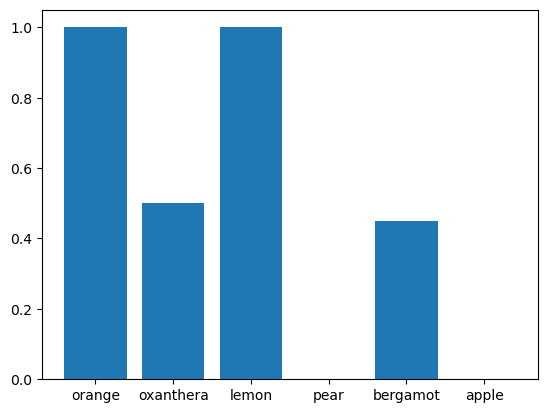

In [15]:
plt.bar(max_t.items, max_t.memberships)

In [16]:
min_t = minimum(oranges, lemons)
min_t("orange")

0.3

In [17]:
min_t[0.2]

array(['orange', 'oxanthera', 'lemon'], dtype='<U9')

(0.0, 1.0)

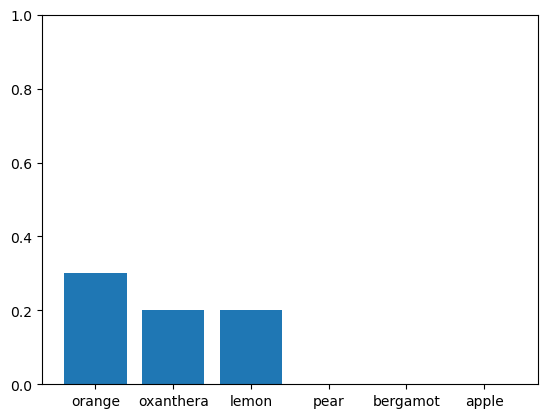

In [18]:
plt.bar(min_t.items, min_t.memberships)
plt.ylim(0,1)

In [19]:
prod_t = product(oranges, lemons)
prod_t('orange')

0.3

In [20]:
prod_t[0.2]

array(['orange', 'lemon'], dtype='<U9')

(0.0, 1.0)

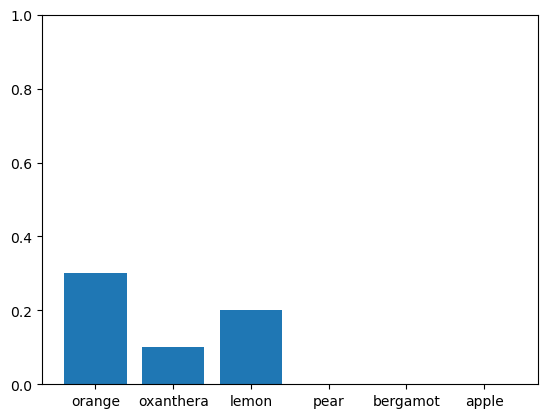

In [21]:
plt.bar(prod_t.items, prod_t.memberships)
plt.ylim(0,1)

In [22]:
owa_ex = owa([oranges, oranges_nodynamic, lemons], w=[0.25, 0.5, 0.25])
owa_ex('orange')

0.825

In [23]:
owa_ex[0.2]

array(['orange', 'oxanthera', 'lemon'], dtype='<U9')

(0.0, 1.0)

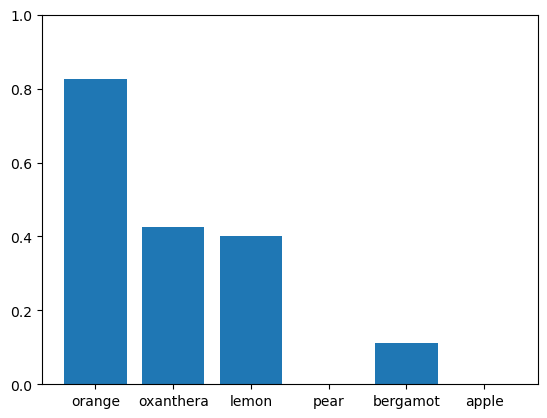

In [24]:
plt.bar(owa_ex.items, owa_ex.memberships)
plt.ylim(0,1)

# Continuous Fuzzy Sets

In [25]:
f = TriangularFuzzyNumber(0, 5, 10)

(0.0, 1.0)

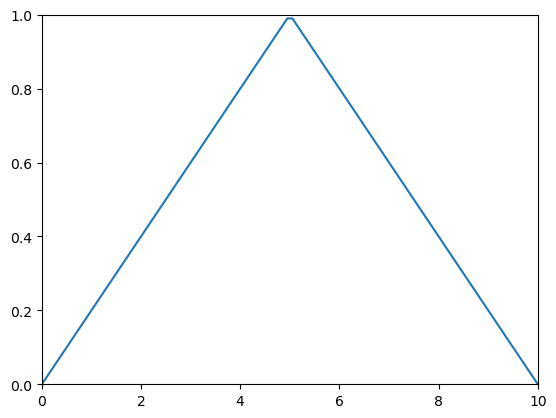

In [26]:
xs = np.linspace(0, 10, 100)
ys = [f(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(0,10)
plt.ylim(0,1)

(0.0, 1.0)

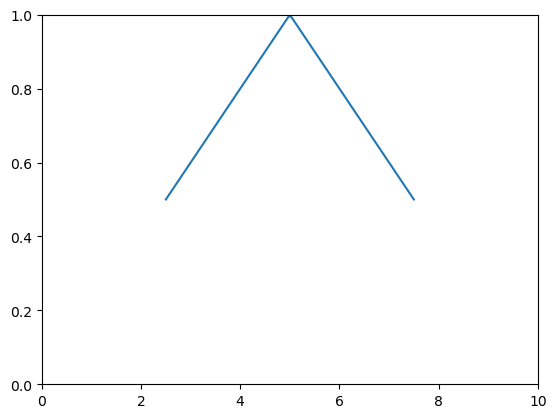

In [27]:
low, upp = f[0.5]
xs = np.linspace(low, upp, 100)
ys = [f(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(0,10)
plt.ylim(0,1)

(2.5, 7.5)


(0.0, 1.1)

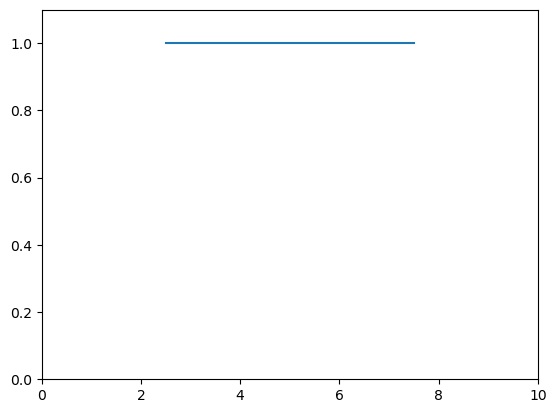

In [28]:
vals = f[0.5]
print(vals)
plt.plot(vals, np.ones(len(vals)))
plt.xlim(0,10)
plt.ylim(0,1.1)

In [29]:
f.fuzziness()

6.1067376022224105

In [30]:
f.hartley()

2.321928094887362

# Operations (Continuous)

(0.0, 1.05)

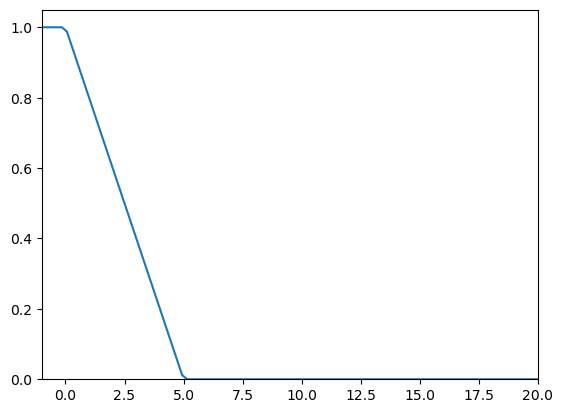

In [31]:
g = RampFuzzyNumber(5, 0)
xs = np.linspace(-1, 20, 100)
ys = [g(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(-1,20)
plt.ylim(0,1.05)

In [32]:
hmax = maximum(f,g)

(0.0, 1.05)

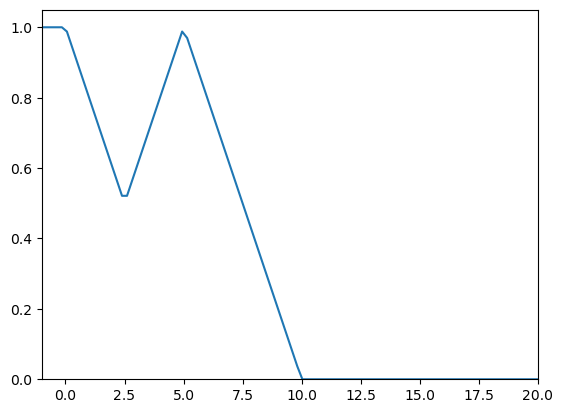

In [33]:
xs = np.linspace(-1, 20, 100)
ys = [hmax(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(-1,20)
plt.ylim(0,1.05)

(0.0, 1.1)

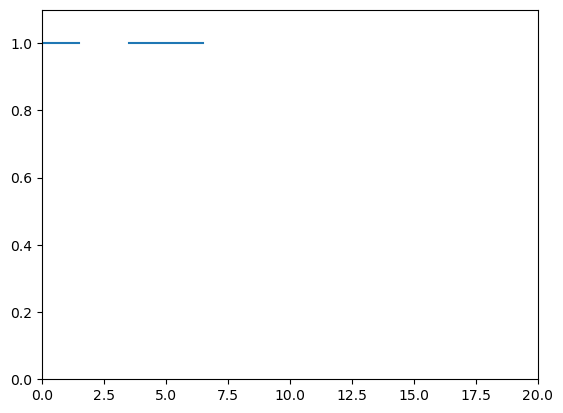

In [34]:
vals = hmax[0.7]
plt.plot(vals, np.ones(len(vals)))
plt.xlim(0,20)
plt.ylim(0,1.1)

In [35]:
hmin = minimum(f,g)

(0.0, 1.0)

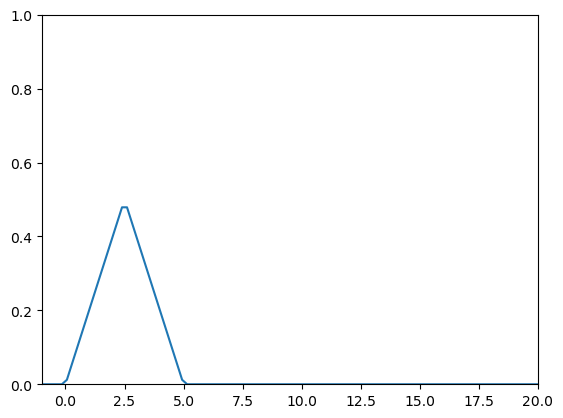

In [36]:
xs = np.linspace(-1, 20, 100)
ys = [hmin(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(-1,20)
plt.ylim(0,1)

(0.0, 1.1)

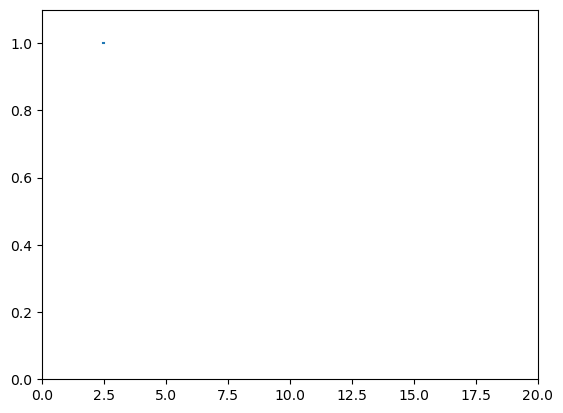

In [37]:
vals = hmin[0.495]
plt.plot(vals, np.ones(len(vals)))
plt.xlim(0,20)
plt.ylim(0,1.1)

(0.0, 1.05)

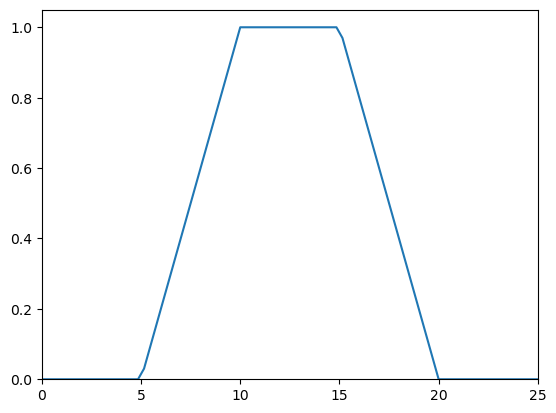

In [38]:
h = TrapezoidalFuzzyNumber(5, 10, 15, 20)
xs = np.linspace(0, 30, 100)
ys = [h(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(0,25)
plt.ylim(0,1.05)

In [39]:
owa_c = owa([f,g,h], [0.05, 0.05, 0.9])

(0.0, 1.0)

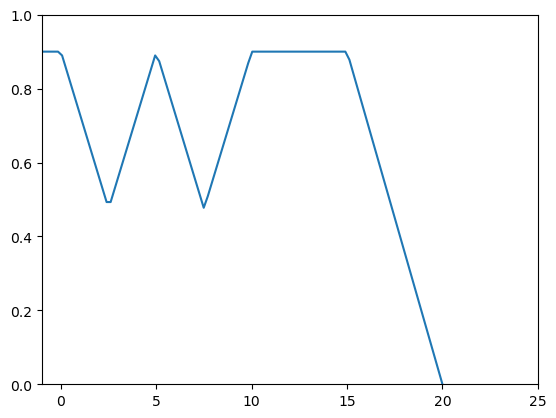

In [40]:
xs = np.linspace(-1, 20, 100)
ys = [owa_c(v) for v in xs]
plt.plot(xs, ys)
plt.xlim(-1,25)
plt.ylim(0,1)

(0.0, 1.1)

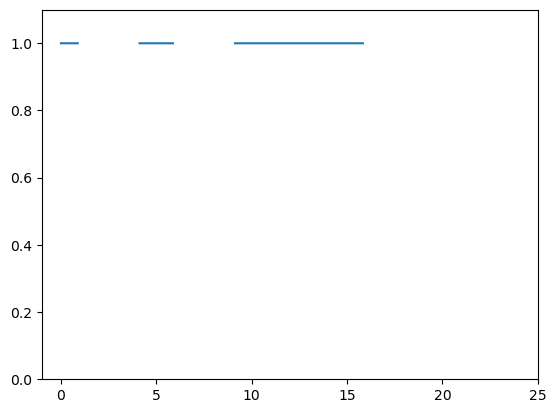

In [41]:
vals = owa_c[0.75]

plt.plot(vals, np.ones(len(vals)))
plt.xlim(-1,25)
plt.ylim(0,1.1)